In [2]:
#Prepare libraries
import numpy as np
#import scipy
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ed2637dd630949c89e9ef2e2a64cc11e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qkko9genTEYXGQWzZ20OMC5oN-VNBxEBa5RVdg3_oNLC',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ed2637dd630949c89e9ef2e2a64cc11e.get_object(Bucket='edx1-donotdelete-pr-dn5npthdappic9',Key='NYCdata.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-11T16:30:41.000,45597712,HEAT/HOT WATER,10473.0,875 MORRISON AVENUE,MORRISON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.821609,-73.872835,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-11T13:03:51.000,45595774,HEAT/HOT WATER,11236.0,1109 EAST 105 STREET,EAST 105 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.644055,-73.890798,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-11T05:14:53.000,45597773,HEAT/HOT WATER,10033.0,129 WADSWORTH AVENUE,WADSWORTH AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848828,-73.935690,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-11T15:51:07.000,45597745,HEAT/HOT WATER,10033.0,1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848783,-73.934140,NaN,RESIDENTIAL BUILDING,Open
4,2020-02-11T10:14:47.000,45596755,HEAT/HOT WATER,11237.0,296 STANHOPE STREET,STANHOPE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.702471,-73.918679,NaN,RESIDENTIAL BUILDING,Open


In [3]:
#Copy the DataFrame
df = df_data_0
df.shape


(6028330, 15)

In [4]:
#Display the first 5 data from DataFrame
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-02-11T16:30:41.000,45597712,HEAT/HOT WATER,10473.0,875 MORRISON AVENUE,MORRISON AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.821609,-73.872835,NaN,RESIDENTIAL BUILDING,Open
1,2020-02-11T13:03:51.000,45595774,HEAT/HOT WATER,11236.0,1109 EAST 105 STREET,EAST 105 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.644055,-73.890798,NaN,RESIDENTIAL BUILDING,Open
2,2020-02-11T05:14:53.000,45597773,HEAT/HOT WATER,10033.0,129 WADSWORTH AVENUE,WADSWORTH AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848828,-73.935690,NaN,RESIDENTIAL BUILDING,Open
3,2020-02-11T15:51:07.000,45597745,HEAT/HOT WATER,10033.0,1401 ST NICHOLAS AVENUE,ST NICHOLAS AVENUE,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.848783,-73.934140,NaN,RESIDENTIAL BUILDING,Open
4,2020-02-11T10:14:47.000,45596755,HEAT/HOT WATER,11237.0,296 STANHOPE STREET,STANHOPE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.702471,-73.918679,NaN,RESIDENTIAL BUILDING,Open


In [5]:
#Display the attributes from DF
df.columns
df.dtypes

created_date               object
unique_key                  int64
complaint_type             object
incident_zip              float64
incident_address           object
street_name                object
address_type               object
city                       object
resolution_description     object
borough                    object
latitude                  float64
longitude                 float64
closed_date                object
location_type              object
status                     object
dtype: object

In [6]:
cpt_count = df['complaint_type'].value_counts()
cpt_count = cpt_count.sort_values(ascending=True)
cpt_count[::-1]

HEAT/HOT WATER            1266588
HEATING                    887869
PLUMBING                   711588
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       452572
PAINT - PLASTER            361257
PAINT/PLASTER              346770
ELECTRIC                   307552
NONCONST                   260890
DOOR/WINDOW                205640
WATER LEAK                 193978
GENERAL                    151596
FLOORING/STAIRS            137532
APPLIANCE                  113043
HPD Literature Request      52830
SAFETY                      51650
OUTSIDE BUILDING             7150
ELEVATOR                     6742
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

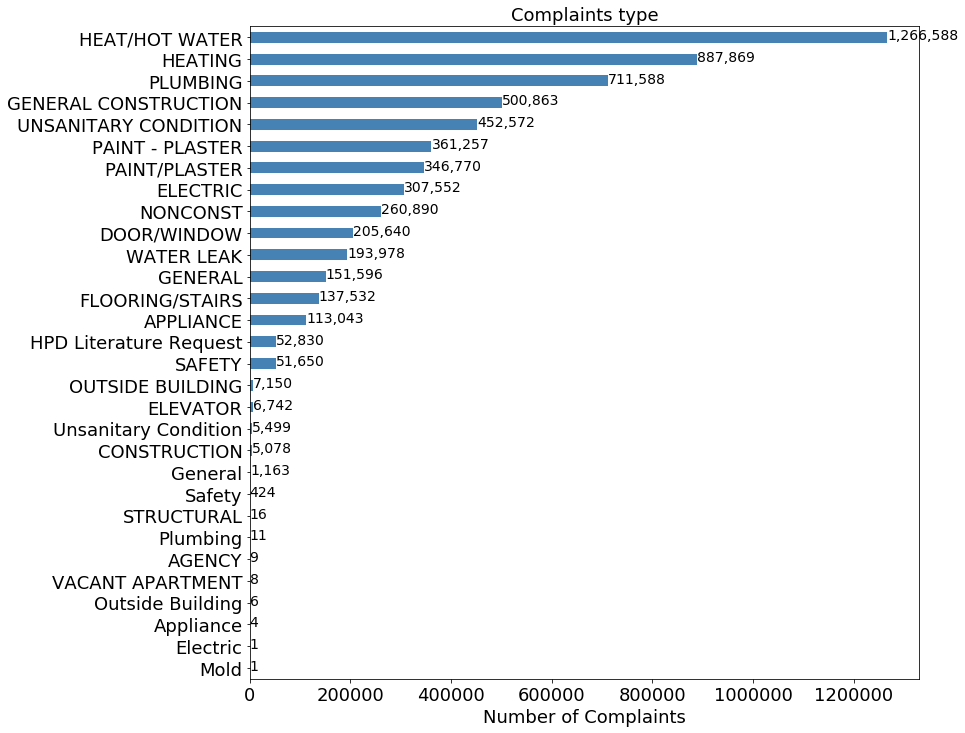

In [7]:
# we can visulize the complaints type and number of complainted in horizontal plot
cpt_count.plot(kind='barh', figsize=(12, 12), color='steelblue',fontsize=18)
plt.xlabel('Number of Complaints',fontsize=18)
plt.title('Complaints type', fontsize=18)

# annotate value labels to each country
for index, value in enumerate(cpt_count): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value, index-0.1 ), color='black', fontsize=14)

plt.show()


After reading the New york city data file, one can see that HEAT/HOT WATER complaint column has been merged with HEATING after 2014. Lets merge them together

In [8]:
df['complaint_type'] = np.where(df['complaint_type']=='HEATING','HEAT/HOT WATER',df['complaint_type'])

In [9]:
df['complaint_type'].value_counts()

HEAT/HOT WATER            2154457
PLUMBING                   711588
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       452572
PAINT - PLASTER            361257
PAINT/PLASTER              346770
ELECTRIC                   307552
NONCONST                   260890
DOOR/WINDOW                205640
WATER LEAK                 193978
GENERAL                    151596
FLOORING/STAIRS            137532
APPLIANCE                  113043
HPD Literature Request      52830
SAFETY                      51650
OUTSIDE BUILDING             7150
ELEVATOR                     6742
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Electric                        1
Name: complain

In [11]:
from datetime import datetime
df['created_date'] = pd.to_datetime(df['created_date'], format = '%Y%m%dT%H:%M:%S.%f')
df.info()
print(df['created_date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028330 entries, 0 to 6028329
Data columns (total 15 columns):
created_date              datetime64[ns]
unique_key                int64
complaint_type            object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
closed_date               object
location_type             object
status                    object
dtypes: datetime64[ns](1), float64(3), int64(1), object(10)
memory usage: 689.9+ MB
0         2020-02-11 16:30:41
1         2020-02-11 13:03:51
2         2020-02-11 05:14:53
3         2020-02-11 15:51:07
4         2020-02-11 10:14:47
5         2020-02-11 20:02:20
6         2020-02-11 11:46:25
7         2020-02-11 07:54:40
8         2020-02-11 16:23:32
9         2020-02-11 16:42:1


one can observe HEATING complaint type being merged with HEAT/HOT WATER complaint type and 'created_date' format is datetime

In [33]:
df['created_year'] = df['created_date'].map(lambda x: x.strftime('%Y')).astype(int)

In [34]:
df['created_month'] = df['created_date'].map(lambda x: x.strftime('%m')).astype(int)

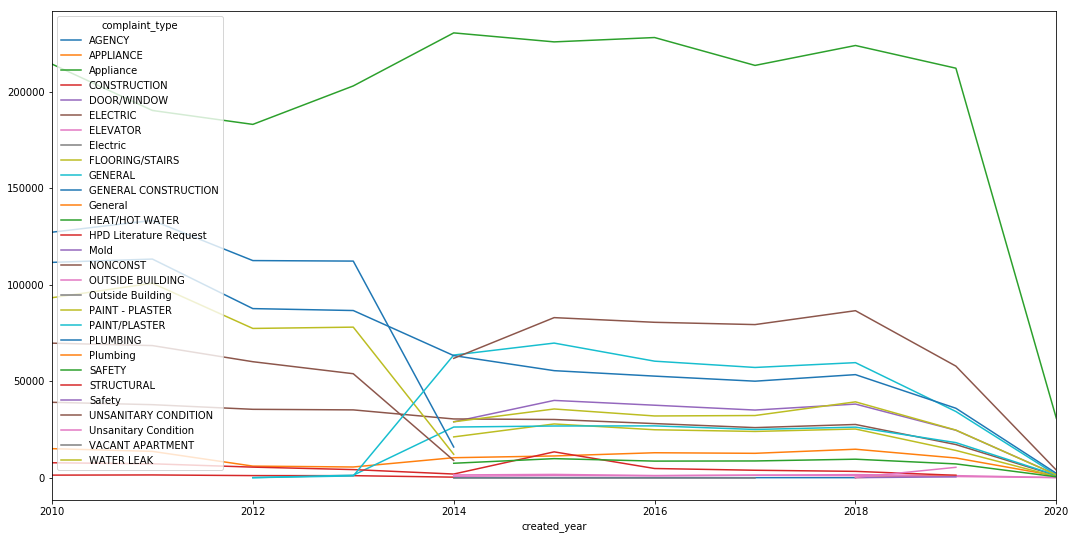

In [35]:
fig, ax = plt.subplots(figsize=(18,9))
df.groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot(ax=ax)

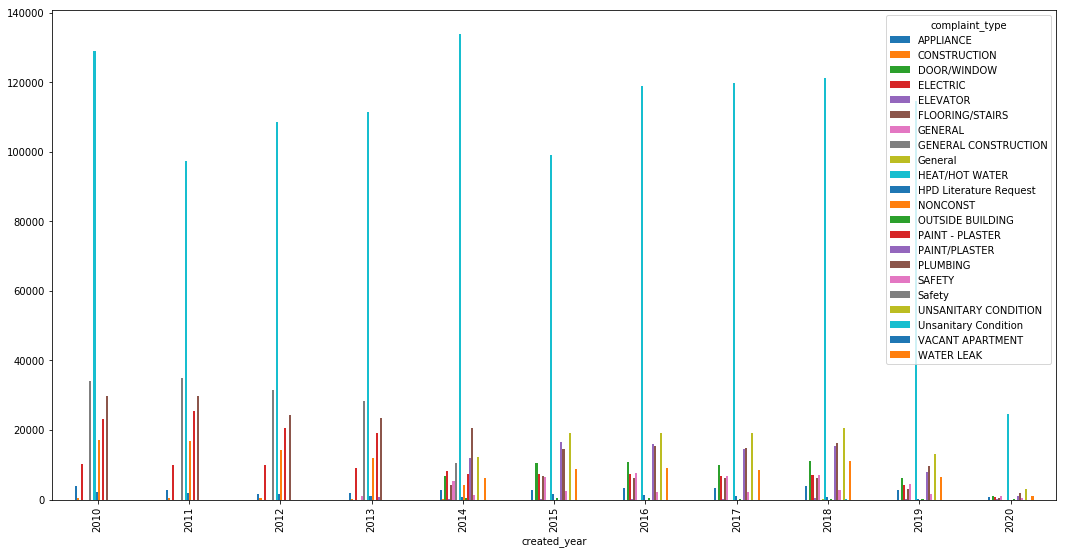

In [36]:
fig, ax = plt.subplots(figsize=(18,9))
df[df['created_month'].isin([11, 12,1])].groupby(['created_year', 'complaint_type']).count()['unique_key'].unstack().plot.bar(ax=ax)


<font color=blue> Looking at the above bar plot, it is clear the Heating complaints is heighest. Here we have specifically focussed on the winter season.
<font color=red> Concluding remarks: Solution of problem 1: Based on the above plot it is clear that maximum number of complaints are coming from HEAT/HOT water category. So HPD should address the HEAT/HOT WATER complaint first. The problem remails all time high. It is clear with the time dependent plots.